In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_weather= pd.read_csv("/content/weatherHistory.csv")

In [ ]:
df_weather_row_count, df_weather_column_count=df_weather.shape
print('Total number of rows:', df_weather_row_count)
print('Total number of columns:', df_weather_column_count)

Total number of rows: 18461
Total number of columns: 12


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18461 entries, 0 to 18460
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            18461 non-null  object 
 1   Summary                   18460 non-null  object 
 2   Precip Type               18460 non-null  object 
 3   Temperature (C)           18460 non-null  float64
 4   Apparent Temperature (C)  18460 non-null  float64
 5   Humidity                  18460 non-null  float64
 6   Wind Speed (km/h)         18460 non-null  float64
 7   Wind Bearing (degrees)    18460 non-null  float64
 8   Visibility (km)           18460 non-null  float64
 9   Loud Cover                18460 non-null  float64
 10  Pressure (millibars)      18460 non-null  float64
 11  Daily Summary             18460 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [ ]:
Summary_Weather=df_weather["Summary"].value_counts().reset_index()
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

,Weather Type,Count
0,Partly Cloudy,6338
1,Mostly Cloudy,4533
2,Overcast,3167
3,Clear,2883
4,Foggy,1215
5,Breezy and Partly Cloudy,96
6,Breezy and Mostly Cloudy,79
7,Breezy and Overcast,62
8,Windy and Partly Cloudy,22
9,Dry,14


In [ ]:
df_weather['Precip Type'].fillna(df_weather['Precip Type'].value_counts().index[0],inplace=True)
df_weather.isna().sum()

Formatted Date              0
Summary                     1
Precip Type                 0
Temperature (C)             1
Apparent Temperature (C)    1
Humidity                    1
Wind Speed (km/h)           1
Wind Bearing (degrees)      1
Visibility (km)             1
Loud Cover                  1
Pressure (millibars)        1
Daily Summary               1
dtype: int64

In [ ]:
df_weather.head().iloc[:5]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
import datetime as dt
from datetime import timedelta

In [ ]:
df_weather["Formatted Date"]=pd.to_datetime(df_weather["Formatted Date"])

<Axes: xlabel='Summary', ylabel='Temperature (C)'>

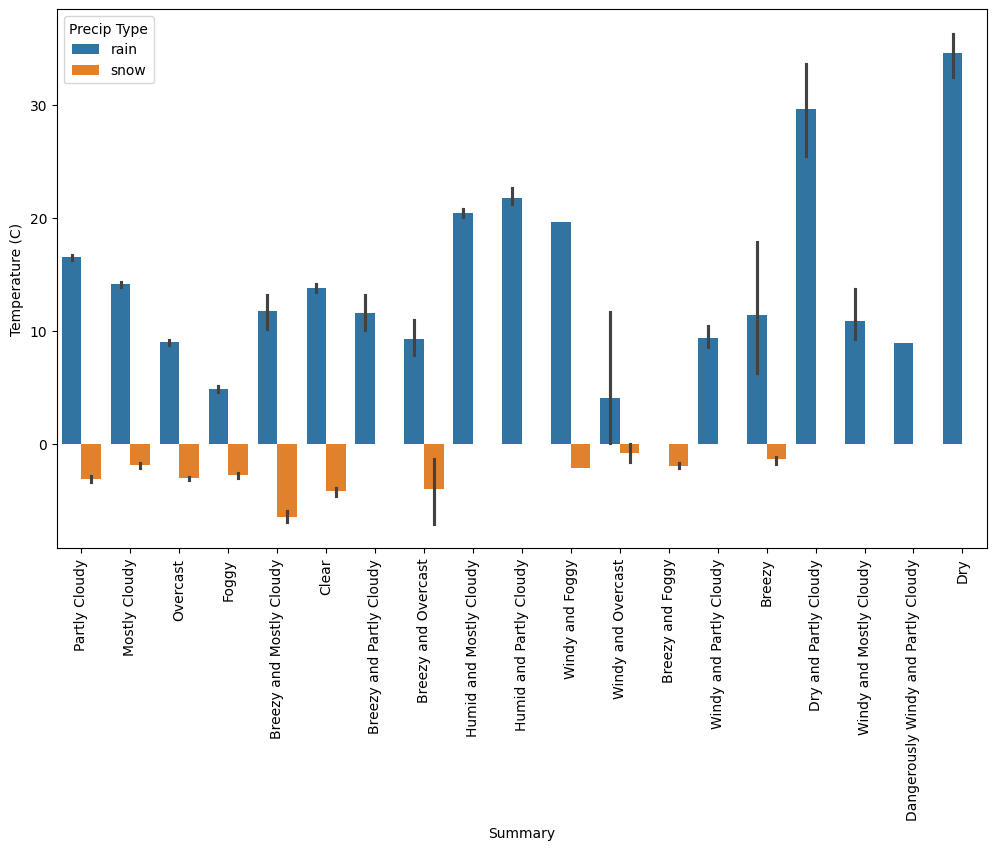

In [ ]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=df_weather, x="Summary", y="Temperature (C)",hue="Precip Type")

<Axes: xlabel='Summary', ylabel='Pressure (millibars)'>

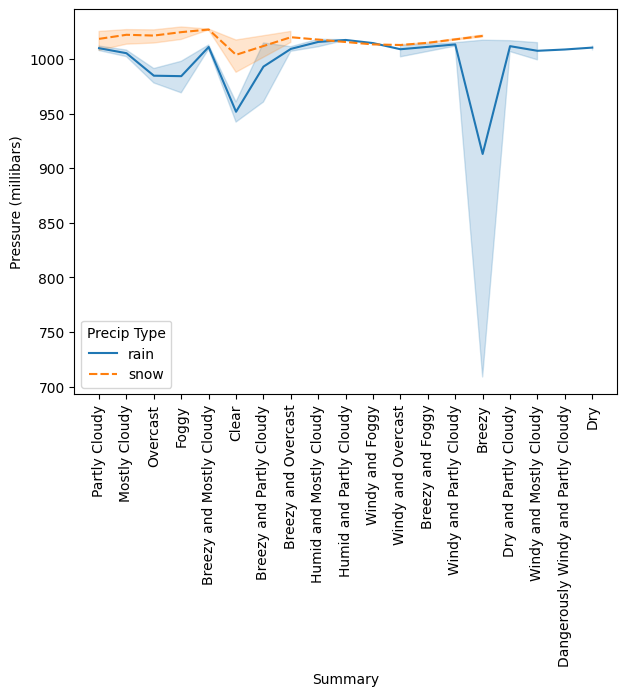

In [ ]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.lineplot(data=df_weather, x="Summary", y="Pressure (millibars)", hue="Precip Type", style="Precip Type")

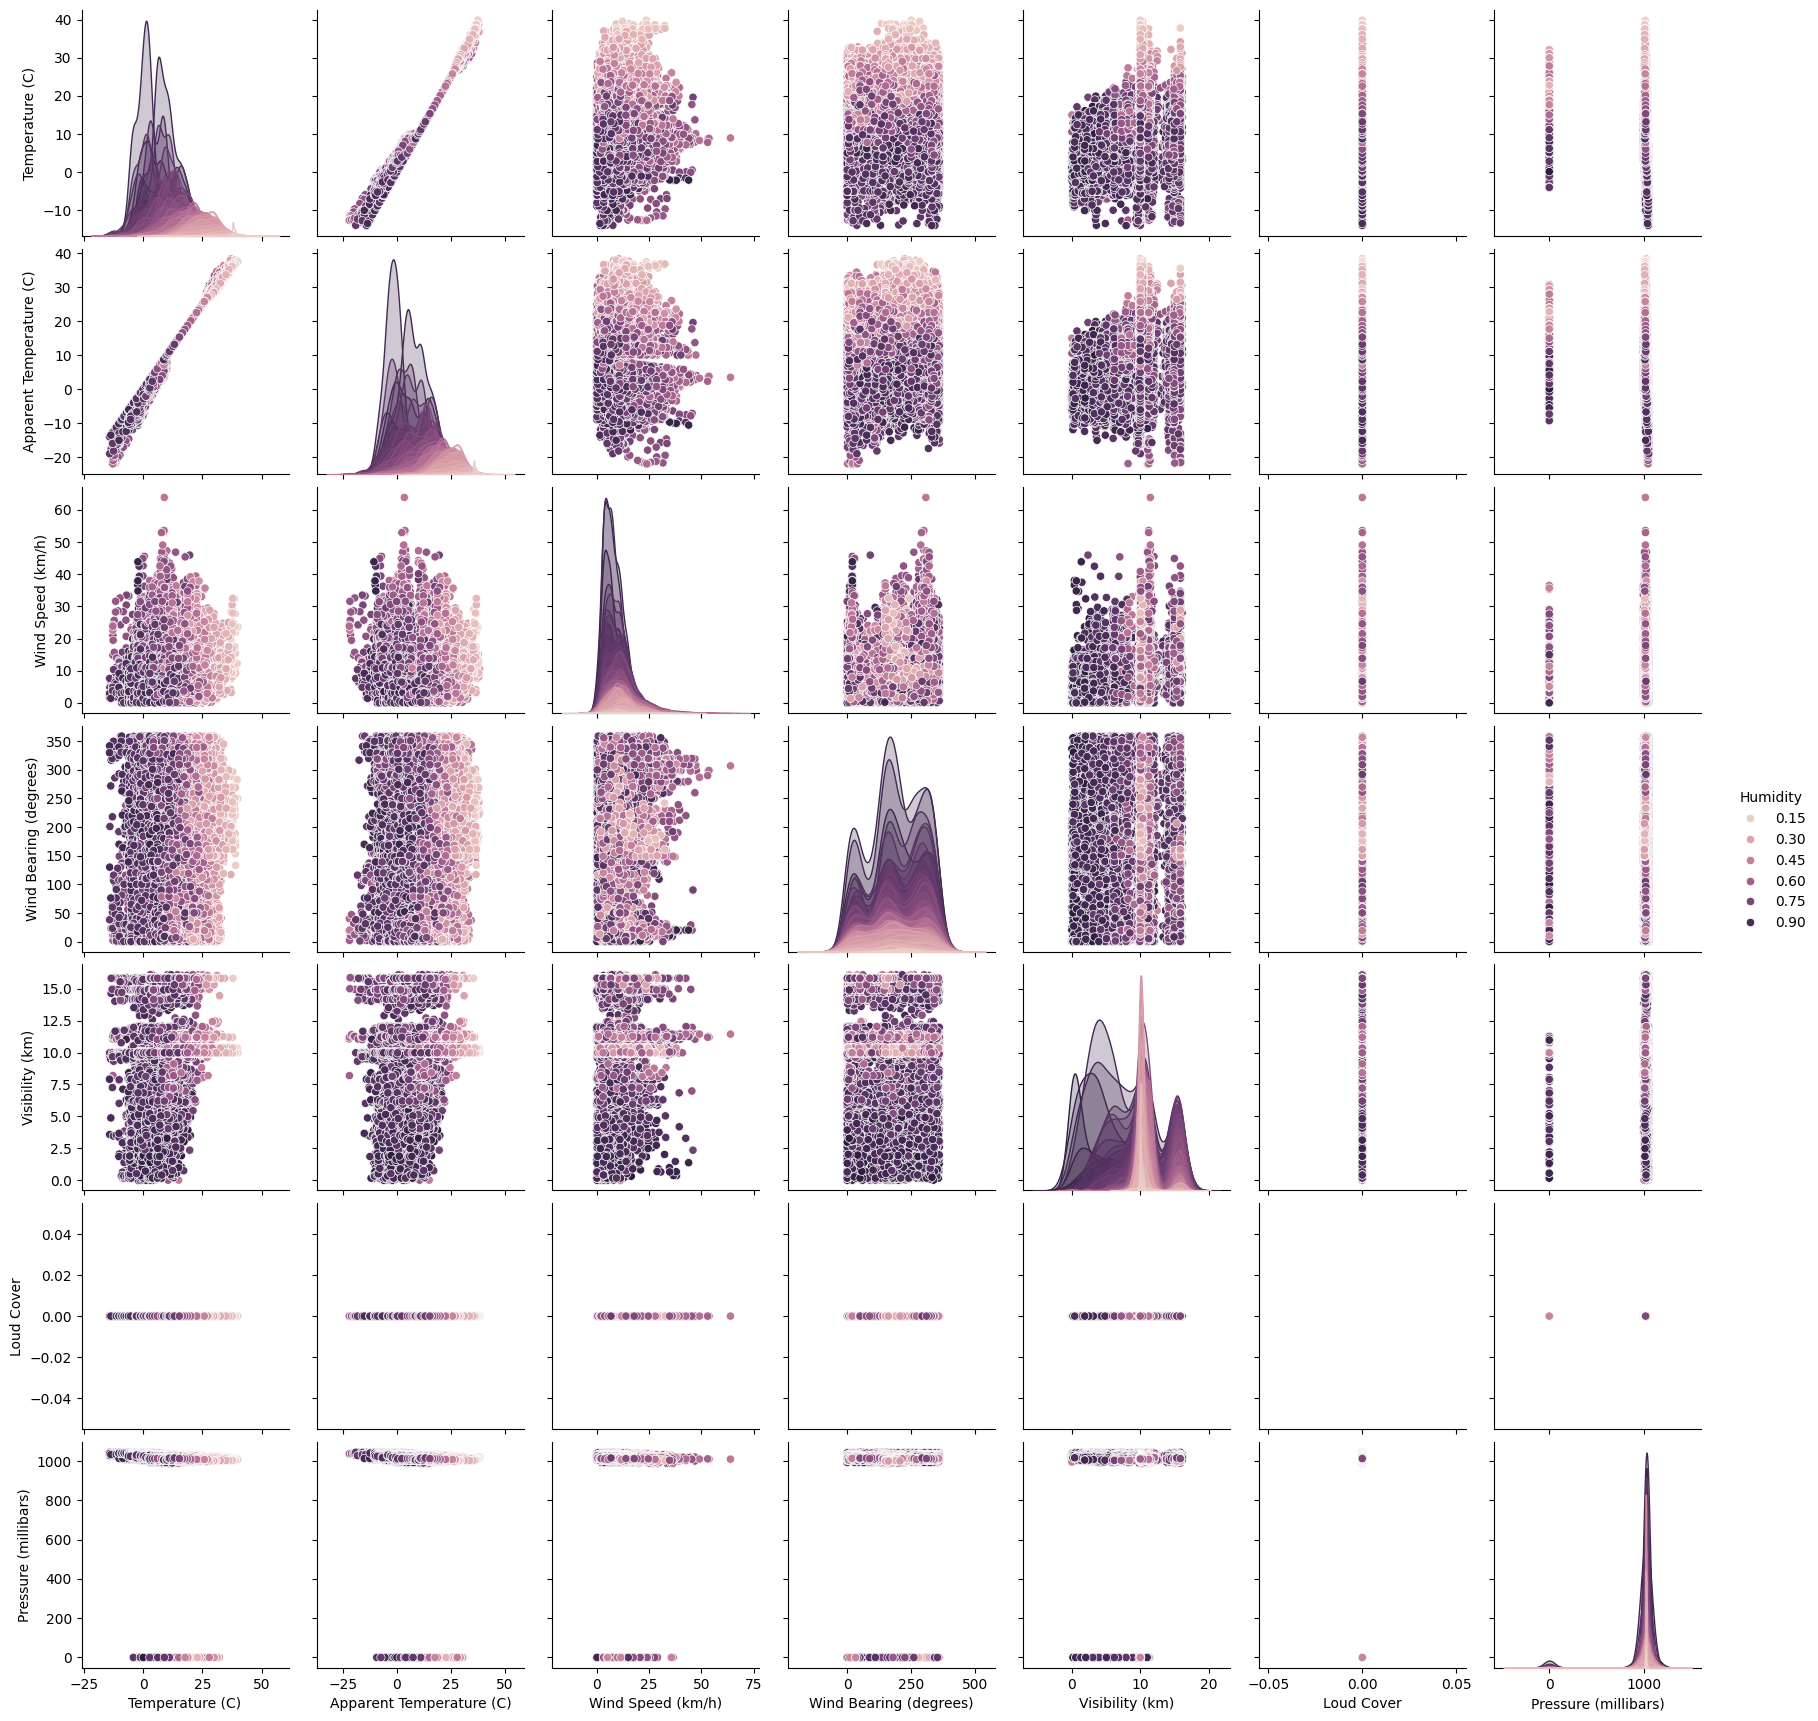

In [ ]:
sns.pairplot(df_weather,hue="Humidity")